<a href="https://colab.research.google.com/github/Lannn21/W8Datamining/blob/main/MaulanaMA_Exercise_Week_8_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a **customer transaction in a certain mall**. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from **Elearn**

In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/Lannn21/W8Datamining/refs/heads/main/mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Annual Income (k$)": "AnnualIncome","Spending Score (1-100)": "SpendingScore"})
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [59]:
# Check for null values in the dataset
df.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


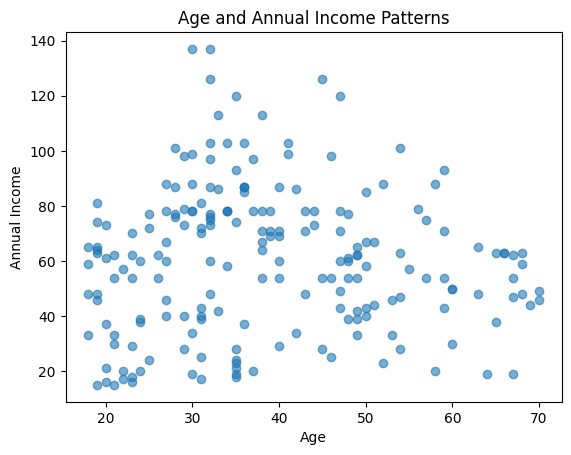

In [60]:
plt.scatter(df["Age"], df["AnnualIncome"], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Age and Annual Income Patterns")
plt.show()

Persebaran antara umur dan pendapatan tahunan berdasarkan data

Persebaran spending

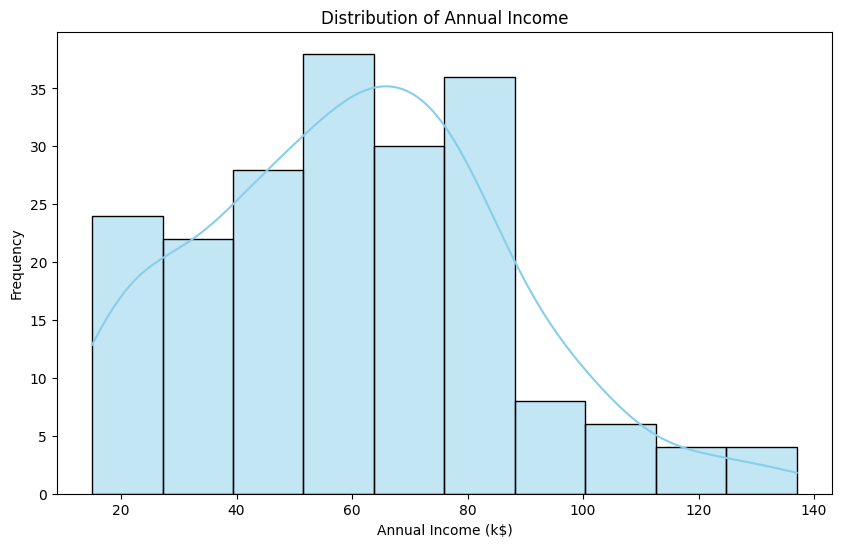

In [61]:
# make an insightful visualization and explain
plt.figure(figsize=(10, 6))
sns.histplot(df['AnnualIncome'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()


Histogram ini menampilkan sebaran Annual Income, memaparkan seberapa sering  rentang pendapatan muncul dalam data. Dengan opsi kernel density estimate (kde)=True, kurva disini ditampilkan untuk membantu melihat pola distribusi secara keseluruhan.

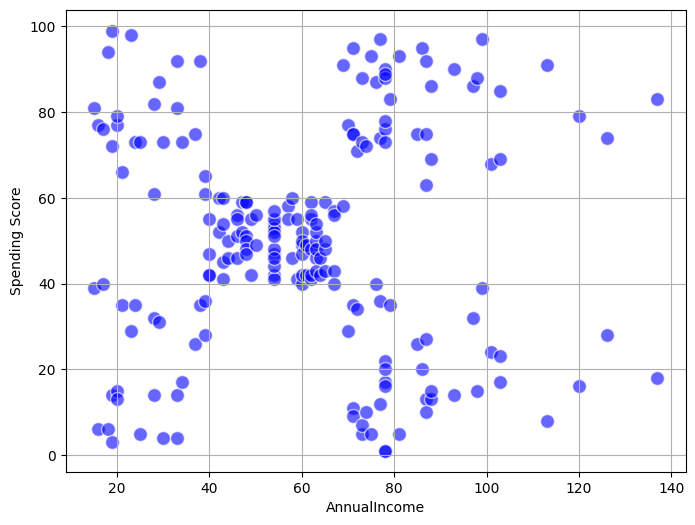

In [62]:
# Visualize the position using the original scale
plt.figure(figsize=(8, 6))
plt.scatter(df["AnnualIncome"], df["SpendingScore"], c="blue", alpha=0.6, edgecolors="w", s=100)
plt.xlabel("AnnualIncome")
plt.ylabel("Spending Score")
plt.grid(True)
plt.show()


## Data Preprocessing

For this case study, we only use income and spending score

In [63]:
# create new dataframe that consist only annual income and spending score
df = df.iloc[:, -2:]
df.head()


,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [64]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df), columns=["AnnualIncome", "SpendingScore"])
df.head()


,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [65]:
# get stastical information on the new dataset
df.describe()

,AnnualIncome,SpendingScore
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

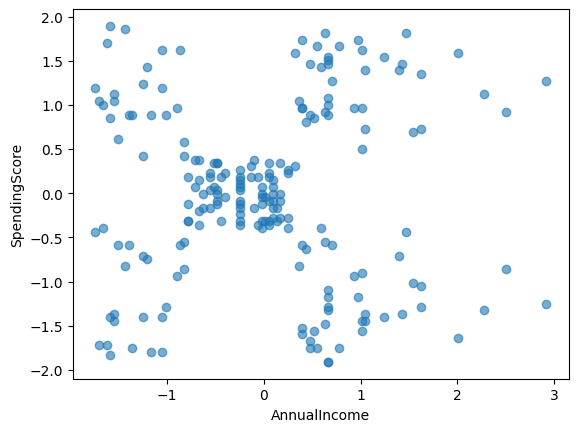

In [66]:
# Visualize the position
import matplotlib.pyplot as plt

plt.scatter(df["AnnualIncome"], df["SpendingScore"], alpha=0.6)
plt.xlabel("AnnualIncome")
plt.ylabel("SpendingScore")
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [67]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans

sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

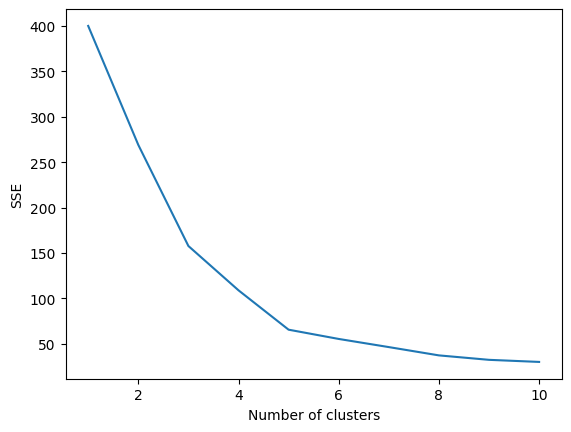

In [68]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [69]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [70]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

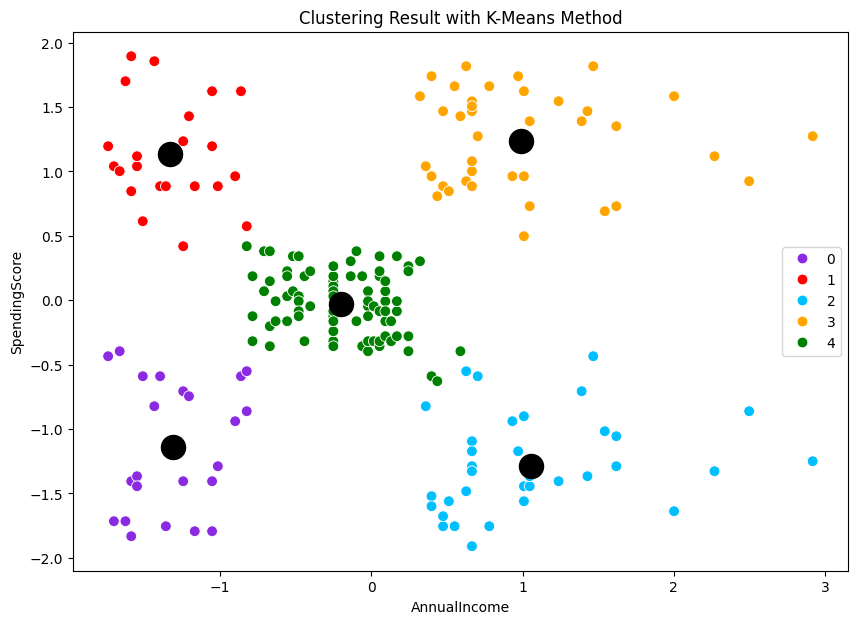

In [71]:
# visualize the result using scater chart
import seaborn as sns
plt.figure(figsize=(10,7))

sns.scatterplot(x = "AnnualIncome", y = "SpendingScore", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "orange", "green"], data=df, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("AnnualIncome")
plt.ylabel("SpendingScore")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [72]:
# Inverse transform the scaled data to get the original values
df = pd.DataFrame(sc.inverse_transform(df), columns=["AnnualIncome", "SpendingScore"])

# Add the cluster labels to the original data
df['Cluster'] = y_pred

# analyze the clusters with the original values
df.head()

,AnnualIncome,SpendingScore,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [73]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_pred).agg({'AnnualIncome': ['mean', 'std', 'min', 'max'],
                                              'SpendingScore': ['mean', 'std', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary


AnnualIncome                         SpendingScore                   \
                mean        std   min    max          mean        std   min   
cluster                                                                       
0          26.304348   7.893811  15.0   39.0     20.913043  13.017167   3.0   
1          25.727273   7.566731  15.0   39.0     79.363636  10.504174  61.0   
2          88.200000  16.399067  70.0  137.0     17.114286   9.952154   1.0   
3          86.538462  16.312485  69.0  137.0     82.128205   9.364489  63.0   
4          55.296296   8.988109  39.0   76.0     49.518519   6.530909  34.0   

               
          max  
cluster        
0        40.0  
1        99.0  
2        39.0  
3        97.0  
4        61.0

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

Berdasarkan hasil klustering menggunakan algoritma K-Means dengan lima kluster, berikut adalah interpretasi dari hasil yang diperoleh serta rekomendasi langkah-langkah yang bisa diambil oleh perusahaan:

Interpretasi Hasil Klustering:
Kluster 0 (Ungu): Kelompok ini memiliki pendapatan tahunan yang rendah hingga sedang, tetapi tingkat pengeluaran yang sangat rendah. Kluster ini mungkin terdiri dari pelanggan yang kurang tertarik untuk berbelanja secara signifikan.

Kluster 1 (Merah): Kelompok ini memiliki pendapatan rendah hingga menengah dengan tingkat pengeluaran yang tinggi. Ini menunjukkan bahwa meskipun pendapatan mereka tidak tinggi, mereka cenderung memiliki kebiasaan belanja yang tinggi. Perusahaan bisa menganggap mereka sebagai pelanggan yang potensial untuk produk-produk diskon atau promosi.

Kluster 2 (Kuning): Pelanggan di kluster ini memiliki pendapatan tahunan yang cukup tinggi, tetapi pengeluaran mereka cukup moderat. Mereka mungkin adalah pelanggan yang hemat meskipun memiliki kapasitas penghasilan yang lebih tinggi. Perusahaan dapat mencoba menawarkan produk premium atau loyalitas untuk menarik perhatian mereka.

Kluster 3 (Hijau): Kluster ini memiliki tingkat penghasilan yang sedang hingga tinggi dengan pengeluaran yang rendah. Ini mungkin termasuk pelanggan yang cukup stabil secara finansial tetapi cenderung tidak boros dalam pengeluaran mereka. Penawaran yang relevan bisa berupa program investasi atau produk yang membantu mereka mengelola keuangan.

Kluster 4 (Biru): Kelompok ini memiliki tingkat pendapatan dan pengeluaran yang tinggi. Mereka adalah pelanggan potensial untuk produk-produk eksklusif dan layanan premium.

<write here>

Rekomendasi untuk Perusahaan:
Personalisasi Penawaran: Berdasarkan karakteristik dari setiap kluster, perusahaan bisa menawarkan promosi yang lebih ditargetkan dan produk yang sesuai dengan kebutuhan mereka. Misalnya, kluster dengan pengeluaran tinggi bisa mendapatkan diskon khusus atau reward program untuk meningkatkan loyalitas.

Strategi Pemasaran Berdasarkan Profil Kluster: Perusahaan dapat mengembangkan strategi pemasaran yang spesifik untuk masing-masing kluster, seperti fokus pada produk hemat untuk kluster dengan penghasilan rendah atau penawaran eksklusif untuk kluster dengan penghasilan tinggi.

Analisis Kebutuhan Kluster: Mengidentifikasi produk atau layanan apa yang paling dibutuhkan oleh setiap kluster dan menyusun strategi pengembangan produk yang sesuai.

Program Loyalitas: Menerapkan program loyalitas khusus untuk kluster-kluster yang cenderung memiliki pengeluaran tinggi, agar mereka tetap berbelanja di perusahaan secara rutin.

Optimasi Kampanye Promosi: Menggunakan informasi kluster ini untuk optimasi kampanye promosi dan iklan. Iklan bisa disesuaikan dengan profil masing-masing kluster untuk meningkatkan efektivitas.